In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 14 19:41:10 2024

@author: MK
"""

from micrograd.engine import Value
from micrograd.nn import MLP
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Image is 8x8 so input neurons have 64 inputs. Output is 3 as the task is to classify
# "0", "1" or "2". The hidden layers size is just an expermient.
# RelU can also be used for experiments.
model = MLP(64, [12, 8, 3], softmax = True, relu = False)

iterations = 100
chart_filter = 10

digits = load_digits()  
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.images, digits.target, test_size=0.95, random_state=42)


# As the naive implementation of Value depends on calling __init__ 
# function dozen of milions of times it is extremely not efficient.
# This is why I limit the task to recognize only "0", "1" or "2".
X_train_raw_stripped = []
y_train_raw_stripped = []
for xi, yi in zip(X_train_raw, y_train_raw):
    if yi < 3:
        X_train_raw_stripped.append(xi)
        y_train_raw_stripped.append(yi)

X_test_raw_stripped = []
y_test_raw_stripped = []
for xi, yi in zip(X_test_raw, y_test_raw):
    if yi < 3:
        X_test_raw_stripped.append(xi)
        y_test_raw_stripped.append(yi)    
    
for i in range(0, 9):
    plt.gray()
    plt.matshow(X_train_raw_stripped[i])
    plt.xlabel(y_train_raw_stripped[i])
    plt.show()

X_train_raw_flatten = []
for xrow in X_train_raw_stripped:
   X_train_raw_flatten.append(np.reshape(xrow, 64))
   
X_test_raw_flatten = []
for xrow in X_test_raw_stripped:
  X_test_raw_flatten.append(np.reshape(xrow, 64))

X_train = []
for x in X_train_raw_flatten:
    converted_x = []
    for xi in x:
        converted_x.append(Value(xi/255))
    X_train.append(converted_x)
    
X_test = []
for x in X_test_raw_flatten:
    converted_x = []
    for xi in x:
        converted_x.append(Value(xi/255))
    X_test.append(converted_x)

j = 0
loss_snapshot = []
accuracy_snapshot = []

def one_hot_encode(value):
    values = []
    for i in range(0, 10):
        if i == value:
            values.append(Value(1.0))
        else:
            values.append(Value(0.0))
    return values

y_train = [one_hot_encode(y) for y in y_train_raw_stripped]
y_test = [one_hot_encode(y) for y in y_test_raw_stripped]

START TRAINING
.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*.^^*FINISHED
--- 135.07004070281982 seconds ---


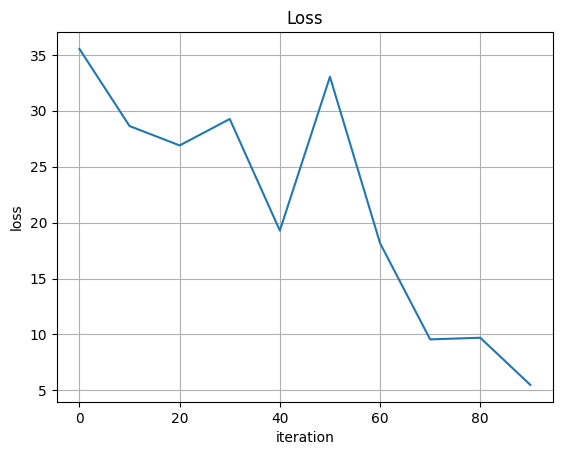

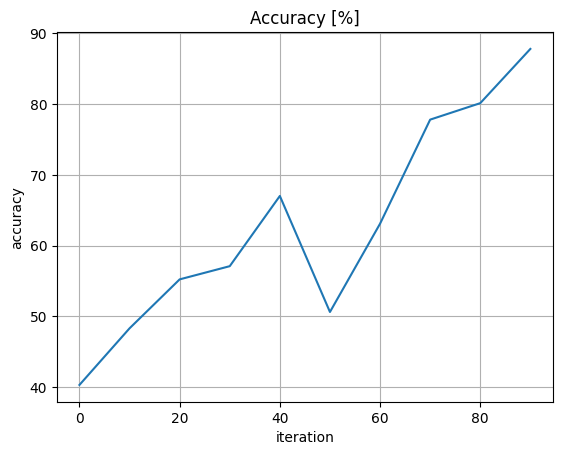

In [2]:
print("START TRAINING")

start_time = time.time()

for i in range(iterations):
    j = j + 1
    print('.', end='')
    scores = list(map(model, X_train))
    print('^', end='')
    loss = model.cross_entropy_loss(scores, y_train)
    if j == chart_filter:
        loss_snapshot.append(loss.data)
        accuracy_snapshot.append(model.accuracy(scores, y_train).data)
        j = 0
    print('^', end='')
    model.optimize(loss, 0.01)
    print('*', end='')

print("FINISHED")
print("--- %s seconds ---" % (time.time() - start_time))

x_axis = np.arange(0.0, iterations, chart_filter)
y_axis = loss_snapshot
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.set(xlabel='iteration', ylabel='loss',
        title='Loss')
ax.grid()

y_axis = accuracy_snapshot
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.set(xlabel='iteration', ylabel='accuracy',
        title='Accuracy [%]')
ax.grid()

plt.show()

TEST for  1


<Figure size 640x480 with 0 Axes>

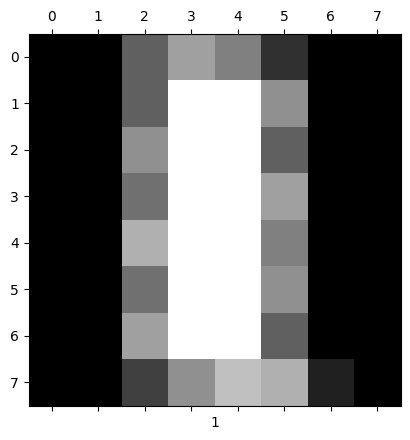

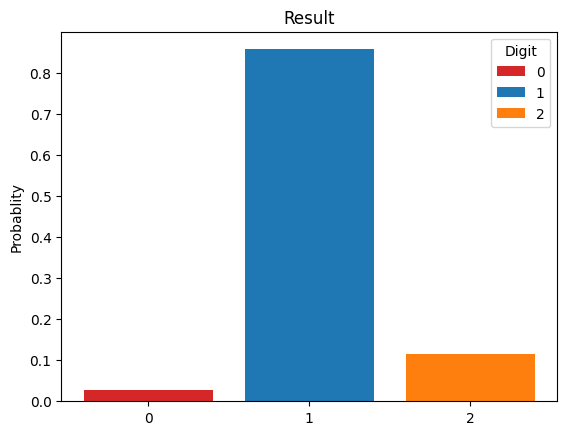

TEST for  0


<Figure size 640x480 with 0 Axes>

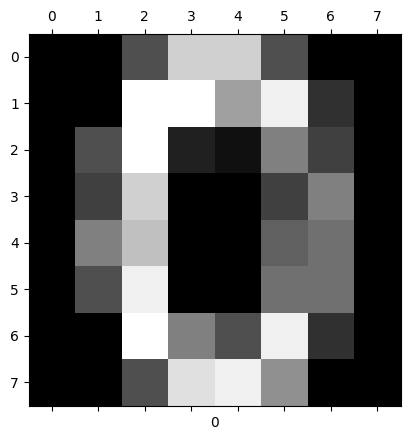

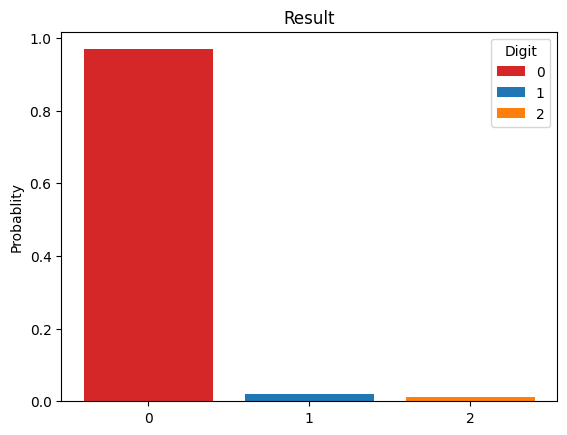

TEST for  0


<Figure size 640x480 with 0 Axes>

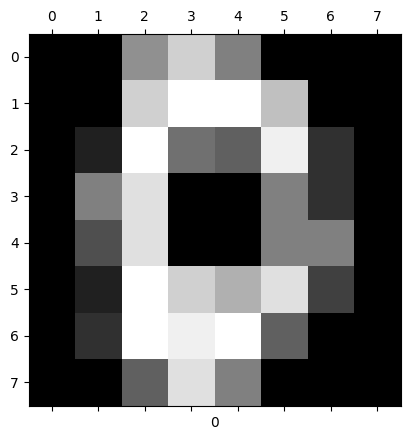

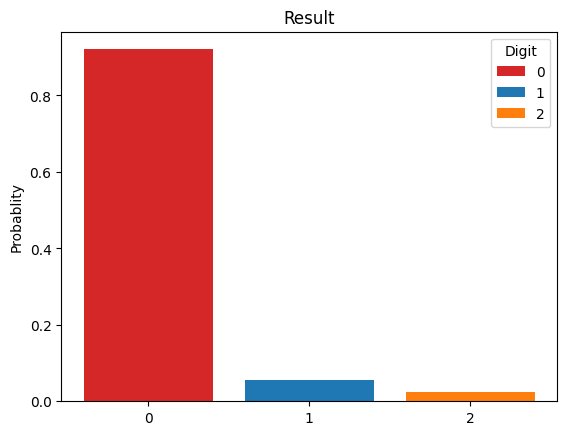

TEST for  0


<Figure size 640x480 with 0 Axes>

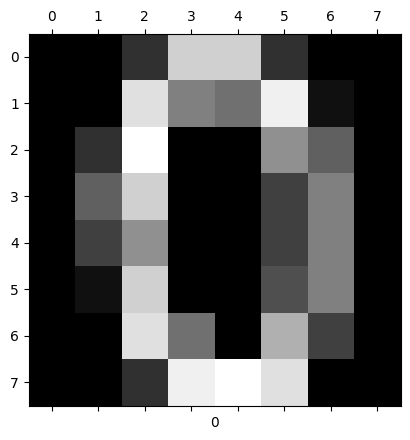

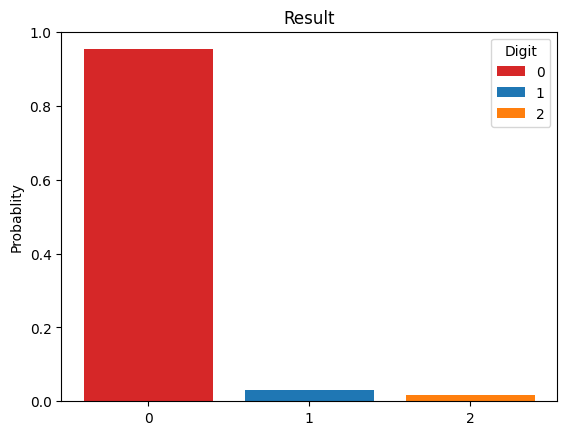

TEST for  1


<Figure size 640x480 with 0 Axes>

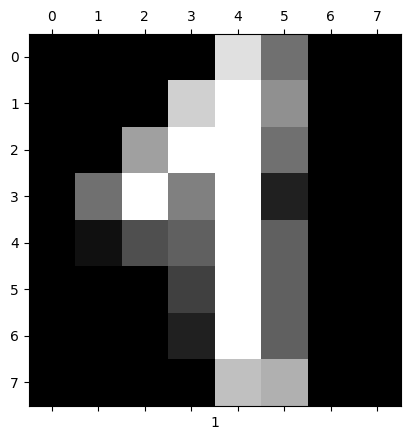

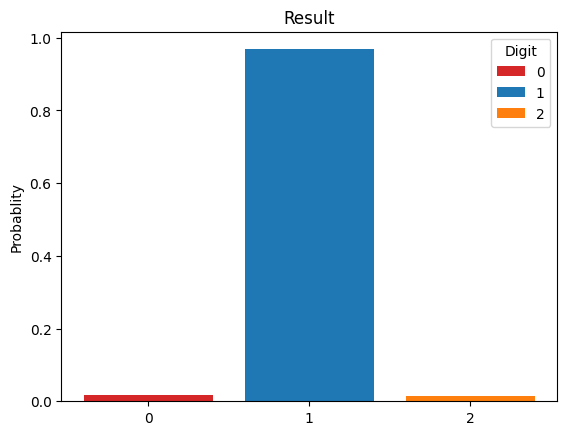

TEST for  0


<Figure size 640x480 with 0 Axes>

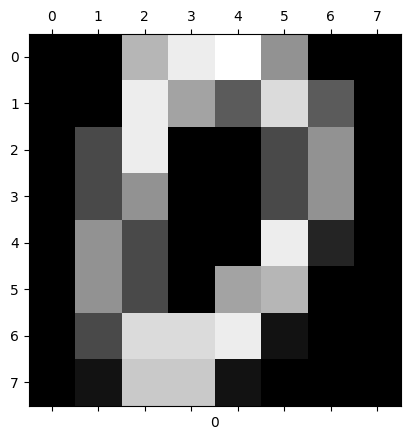

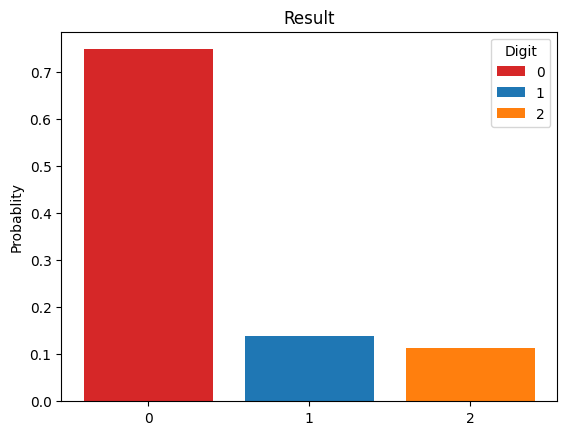

TEST for  2


<Figure size 640x480 with 0 Axes>

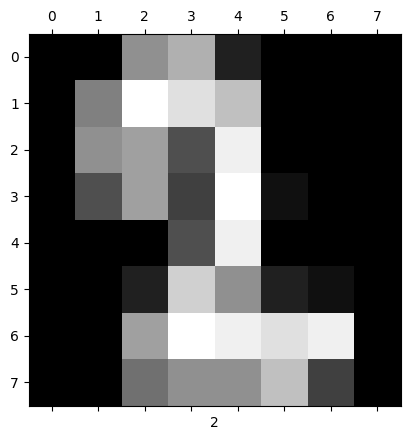

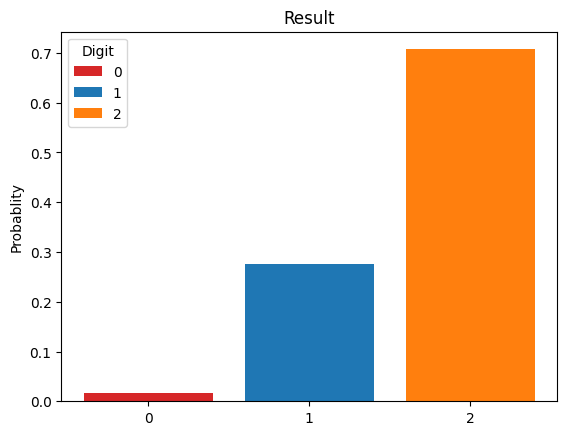

TEST for  0


<Figure size 640x480 with 0 Axes>

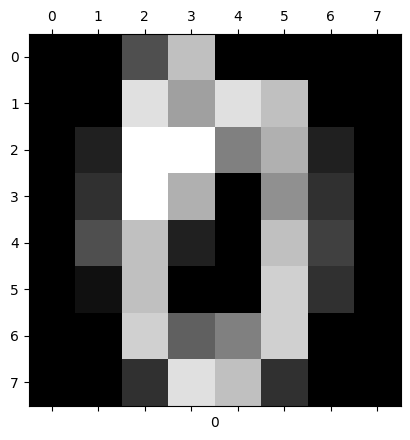

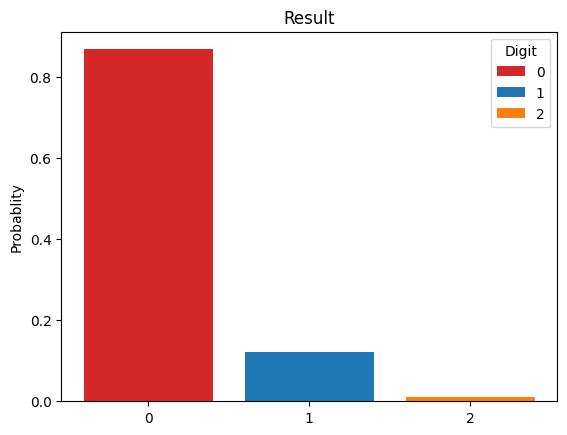

TEST for  0


<Figure size 640x480 with 0 Axes>

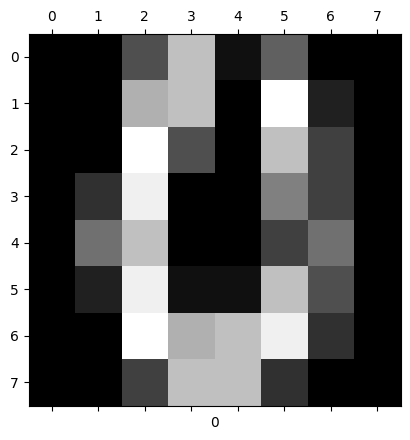

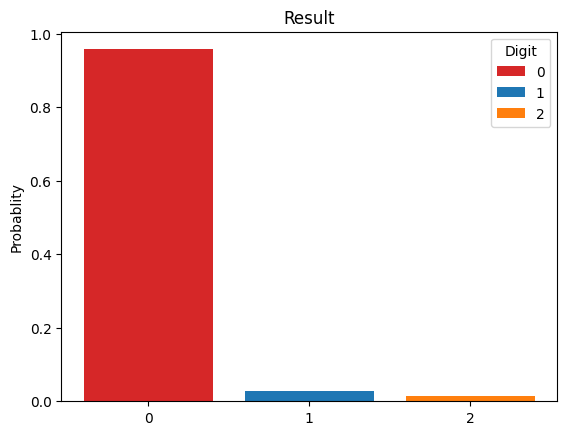

In [8]:
def show_result(index):    
   print("TEST for ", y_test_raw_stripped[index])
   test_result = model(X_test[index])
   plt.gray()
   plt.matshow(X_test_raw_stripped[index])
   plt.xlabel(y_test_raw_stripped[index])
   plt.show()

   fig, ax = plt.subplots()

   digits = ['0', '1', '2']
   counts = [test_result[0].data, test_result[1].data, test_result[2].data]
   bar_labels = ['0', '1', '2']
   bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

   ax.bar(digits, counts, label=bar_labels, color=bar_colors)
   ax.set_ylabel('Probablity')
   ax.set_title('Result')
   ax.legend(title='Digit')

   plt.show()

for i in range(11, 20):
    show_result(i)